### Supermarket data science case study - Exploring first data


### Importing packages

In [1]:
import pandas as pd
import sys
import matplotlib.pyplot as plt
import sklearn

from sklearn.pipeline import Pipeline, make_pipeline

### Functions

In [2]:
def f_concat(l_input):

    # Initialize.
    dummy = ""
    n_len = len(l_input)

    if n_len == 1:
        return l_input[0]

    # Loop through text elements.
    for i in range(n_len - 1):
        dummy = dummy + l_input[i] + ", "

    # Append last element.
    dummy = dummy + "and " + l_input[n_len - 1]

    # Return result.
    return dummy

In [3]:

# This functions prints the first n_top rows of the input data frame, as well as the description of the numerical and textual data.
# The function also prints the number of missing values for each feature.
# The function is useful for the initial data exploration.

# function signature, 
def f_describe(df_input, n_top=10):
    # function body
    """Docstring: # This functions prints the first n_top rows of the input data frame, as well as the description of the numerical and textual data.
        The function also prints the number of missing values for each feature.
        The function is useful for the initial data exploration.
        
        In the function signature, the function takes two arguments, df_input and n_top. The default value of n_top is 10. df_input is the input data frame.
        
        The function body is as follows:
        The function first prints the first n_top rows of the input data frame using the head() method. (line 33)
        The function then selects the numerical data from the input data frame using the select_dtypes() method with the include parameter set to the numerical data types. (line 35)
        If there are numerical columns in the data frame, the function prints the description of the numerical data using the describe() method. (line 37)
    
        """
    
    # Print the first n_top rows of the data
    print("First " + str(n_top) + " rows in de data:")
    display(df_input.head(n_top))

    # Print the description of the numerical data
    df_numeric = df_input.select_dtypes(
        include=[
            "uint8",
            "uint16",
            "uint32",
            "uint64",
            "int8",
            "int16",
            "int32",
            "int64",
            "float16",
            "float32",
            "float64",
        ]
    )

    if len(df_numeric.columns):
        print("Numerical data:")
        display(df_numeric.describe())

    # Print the description of the textual data
    df_textual = df_input.select_dtypes(include=["category", "object", "bool"])

    if len(df_textual.columns):
        print("Textual data:")
        display(df_textual.describe())

    # Print the number of missing values for each feature
    v_na = [
        col 
        + " ("
        + str(df[col].isna().sum())
        + ", "
        + str(round(100 * df[col].isna().sum() / df.shape[0], 1))
        + "%)"
        for col in df.columns
        if df[col].isna().sum() > 0
    ]
    # how does the loop know what df is? 
    # df is not defined in the function.


    if len(v_na) > 0:
        print("Features and their number of missing values:")
        display(f_concat(v_na))

In [4]:
help(f_describe)

Help on function f_describe in module __main__:

f_describe(df_input, n_top=10)
    Docstring: # This functions prints the first n_top rows of the input data frame, as well as the description of the numerical and textual data.
    The function also prints the number of missing values for each feature.
    The function is useful for the initial data exploration.



### Downcast and transform data
Update formatting of features to optimize memory and standardize column names.

In [5]:
def standardize_column_names(s):
    return s.replace(" ", "")


def optimize_memory(df):
    # Change: Objects to Categorical.                                               #WHEN needed to transform Objects to Categorical?
    # object_cols = df.select_dtypes(include="object").columns
    # if not object_cols.empty:
    #     print("Change: Objects to Categorical")
    #     df[object_cols] = df[object_cols].astype("category")

    # Change: Convert integers to smallest unsigned integer and floats to smallest.
    for old, new in [("integer", "unsigned"), ("float", "float")]:
        print("Change: " + old + " --> " + new)
        for col in df.select_dtypes(include=old).columns:
            df[col] = pd.to_numeric(df[col], downcast=new)
    return df


def month_year_to_int(df, i):
    # Change: Month and Year to integer
    if i == 0:
        print("Change: Month and Year to integer")
        df = df.astype({"month": int, "year": int})

    return df

### Transform date-related columns to datetime format.

In [6]:
# Convert datasets to time series
def transform_date_to_datetime(df, i):
    if i == 0:
        print("Change: Transformed 'year', 'month', 'day' columns to Datetime feature")
        df["date"] = pd.to_datetime(df[["year", "month", "day"]], unit="us")

        print(
            "Change: Dropped 'year', 'month', 'day' columns and transformed to Datetime64[us] feature"
        )
        df.drop(columns=["day", "month", "year"], inplace=True)

    else:
        if "date" in df.columns:
            print("Change: Transformed 'date' column to Datetime Dtype")
            df["date"] = pd.to_datetime(df["date"]).dt.tz_localize(None)

    return df

### Import data from local PATH
Import data trough pipeline to downcast the data and transformations

In [7]:
def f_get_data(i=0):

    # Define path.
    c_path = "C:/Users/sebas/OneDrive/Documenten/GitHub/Supermarketcasegroupproject/Group4B/data/raw/"

    # Identify file.
    v_file = (
        "history-per-year",  # 0
        "history_aggregated",  # 1
        "holidays_events",  # 2
        "items",  # 3
        "oil",  # 4
        "stores",  # 5
        "transactions",
    )  # 6

    # Load data.
    df = (
        pd.read_parquet(c_path + v_file[i] + ".parquet")
        .rename(columns=standardize_column_names)
        .pipe(optimize_memory)
        .pipe(month_year_to_int, i)
        # .pipe(transform_date_to_datetime, i)
    )

    # Return data.
    return df


### Importing data

In [8]:
df = f_get_data(1)

Change: integer --> unsigned
Change: float --> float


In [9]:
f_describe(df)

First 10 rows in de data:


,onpromotion,item_nbr,week,date,unit_sales_sum,count,family,class,perishable
0,False,764438,201323,2013-06-04 00:00:00+00:00,1925.0,180,GROCERY I,1072,0
1,False,764438,201324,2013-06-11 00:00:00+00:00,1516.0,164,GROCERY I,1072,0
2,False,764438,201325,2013-06-18 00:00:00+00:00,1656.0,176,GROCERY I,1072,0
3,False,764438,201326,2013-06-25 00:00:00+00:00,1610.0,177,GROCERY I,1072,0
4,False,764438,201327,2013-07-02 00:00:00+00:00,1987.0,182,GROCERY I,1072,0
5,False,764438,201328,2013-07-09 00:00:00+00:00,1588.0,169,GROCERY I,1072,0
6,False,764438,201329,2013-07-16 00:00:00+00:00,1688.0,171,GROCERY I,1072,0
7,False,764438,201330,2013-07-23 00:00:00+00:00,1572.0,165,GROCERY I,1072,0
8,False,764438,201331,2013-07-30 00:00:00+00:00,1755.0,176,GROCERY I,1072,0
9,False,764438,201332,2013-08-06 00:00:00+00:00,1780.0,178,GROCERY I,1072,0


Numerical data:


,unit_sales_sum,count,class,perishable
count,948220.000000,948220.000000,948220.000000,948220.000000
mean,1132.237528,132.350130,2152.235304,0.320138
std,2018.911355,103.404191,1337.917574,0.466530
min,-9757.000000,1.000000,1002.000000,0.000000
25%,137.000000,27.000000,1072.000000,0.000000
50%,627.000000,131.000000,2022.000000,0.000000
75%,1290.000000,213.000000,2718.000000,1.000000
max,120981.760000,378.000000,7780.000000,1.000000


Textual data:


,onpromotion,family
count,948220,948220
unique,2,33
top,False,GROCERY I
freq,676666,292938


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 948220 entries, 0 to 948219
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   onpromotion     948220 non-null  bool               
 1   item_nbr        948220 non-null  uint32             
 2   week            948220 non-null  uint32             
 3   date            948220 non-null  datetime64[us, UTC]
 4   unit_sales_sum  948220 non-null  float64            
 5   count           948220 non-null  uint16             
 6   family          948220 non-null  category           
 7   class           948220 non-null  uint16             
 8   perishable      948220 non-null  uint8              
dtypes: bool(1), category(1), datetime64[us, UTC](1), float64(1), uint16(2), uint32(2), uint8(1)
memory usage: 28.0 MB


### Some Statistics:

In [11]:
print("The data\n")
print(
    f"-> Contains:                {round(df.shape[0]/1e6, 1)} million observations and {df.shape[1]} features.\n"
)
print(
    f"-> Contains:                {df.shape[0]} observations and {df.shape[1]} features.\n"
)
print(f"-> Have feature names:      {f_concat(df.columns)}.\n")
print(f"-> Has optimized size of    {round(sys.getsizeof(df)/1024/1024/1024, 2)} GB.")

The data

-> Contains:                0.9 million observations and 9 features.

-> Contains:                948220 observations and 9 features.

-> Have feature names:      onpromotion, item_nbr, week, date, unit_sales_sum, count, family, class, and perishable.

-> Has optimized size of    0.03 GB.


In [12]:
# df = f_get_data(0)
# f_describe(df)

# df.head()
# df.tail(10)
df.sample(20)
# df.info()
# df.describe()
# df.nunique

,onpromotion,item_nbr,week,date,unit_sales_sum,count,family,class,perishable
392293,False,1906100,201443,2014-10-22 00:00:00+00:00,685.000,106,PRODUCE,2020,1
770021,False,223434,201504,2015-01-22 00:00:00+00:00,2325.000,309,GROCERY I,1032,0
838531,False,414478,201551,2015-12-17 00:00:00+00:00,1032.000,218,BREAD/BAKERY,2718,1
391429,False,1903500,201633,2015-08-14 00:00:00+00:00,477.667,84,MEATS,2302,1
930666,False,692531,201610,2015-03-06 00:00:00+00:00,4302.000,349,GROCERY I,1040,0
342714,False,1473411,201438,2014-09-17 00:00:00+00:00,545.205,156,PRODUCE,2028,1
305895,False,1457337,201622,2015-05-29 00:00:00+00:00,2208.000,169,HOME CARE,3106,0
738572,False,122419,201719,2016-05-15 00:00:00+00:00,452.000,174,GROCERY I,1004,0
39755,False,848953,201334,2013-08-20 00:00:00+00:00,370.000,137,CLEANING,3016,0
833720,False,409738,201510,2015-03-05 00:00:00+00:00,3133.000,306,BREAD/BAKERY,2708,1


In [23]:
df = f_get_data(1)
# f_describe(df)
df.info()
df.sample(20)
df.describe()

Change: integer --> unsigned
Change: float --> float
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 948220 entries, 0 to 948219
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   onpromotion     948220 non-null  bool               
 1   item_nbr        948220 non-null  uint32             
 2   week            948220 non-null  uint32             
 3   date            948220 non-null  datetime64[us, UTC]
 4   unit_sales_sum  948220 non-null  float64            
 5   count           948220 non-null  uint16             
 6   family          948220 non-null  category           
 7   class           948220 non-null  uint16             
 8   perishable      948220 non-null  uint8              
dtypes: bool(1), category(1), datetime64[us, UTC](1), float64(1), uint16(2), uint32(2), uint8(1)
memory usage: 28.0 MB


,item_nbr,week,unit_sales_sum,count,class,perishable
count,9.482200e+05,948220.000000,948220.000000,948220.000000,948220.000000,948220.000000
mean,1.033259e+06,201558.380135,1132.237528,132.350130,2152.235304,0.320138
std,5.244086e+05,121.625703,2018.911355,103.404191,1337.917574,0.466530
min,9.699500e+04,201301.000000,-9757.000000,1.000000,1002.000000,0.000000
25%,5.841250e+05,201447.000000,137.000000,27.000000,1072.000000,0.000000
50%,1.047756e+06,201552.000000,627.000000,131.000000,2022.000000,0.000000
75%,1.456935e+06,201644.000000,1290.000000,213.000000,2718.000000,1.000000
max,2.127114e+06,201733.000000,120981.760000,378.000000,7780.000000,1.000000


Change: integer --> unsigned
Change: float --> float
[201323 201324 201325 201326 201327 201328 201329 201330 201331 201332
 201333 201334 201335 201336 201337 201338 201339 201340 201341 201342
 201343 201344 201345 201346 201347 201348 201349 201350 201351 201352
 201401 201402 201403 201404 201405 201406 201407 201408 201409 201410
 201411 201412 201413 201414 201415 201416 201417 201418 201419 201420
 201421 201422 201423 201424 201425 201426 201427 201428 201429 201430
 201431 201432 201433 201434 201435 201436 201437 201438 201439 201440
 201441 201442 201443 201444 201445 201446 201447 201448 201449 201450
 201451 201452 201501 201502 201503 201504 201505 201506 201507 201508
 201509 201510 201511 201512 201513 201514 201515 201516 201517 201518
 201519 201520 201521 201522 201523 201524 201525 201526 201527 201528
 201529 201530 201531 201532 201533 201534 201535 201536 201537 201538
 201539 201540 201541 201542 201543 201544 201545 201546 201547 201548
 201549 201550 201551 20

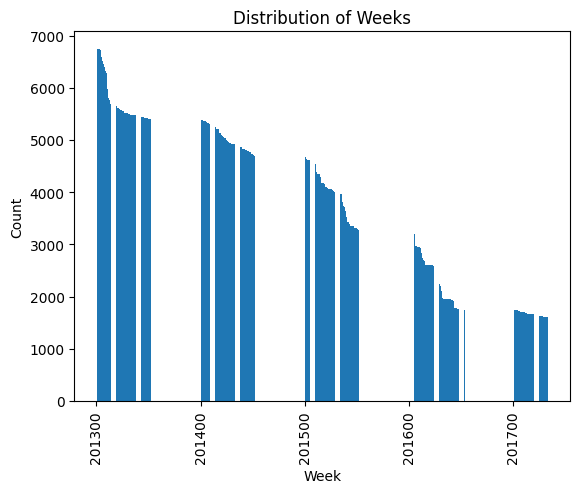

In [24]:
df = f_get_data(1)
unique_values = df['week'].unique()
print(unique_values)
import matplotlib.pyplot as plt

# Count the occurrences of each unique value in the "week" column
week_counts = df['week'].value_counts()

# Sort the unique values in ascending order
weeks = sorted(week_counts.index)

# Create the bar chart
plt.bar(weeks, week_counts)

# Set the labels and title
plt.xlabel('Week')
plt.ylabel('Count')
plt.title('Distribution of Weeks')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Display the chart
plt.show()




In [14]:
df = f_get_data(2)
f_describe(df)
df.info()
df.sample(20)

Change: integer --> unsigned
Change: float --> float
First 10 rows in de data:


,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False
5,2012-05-12,Holiday,Local,Puyo,Cantonizacion del Puyo,False
6,2012-06-23,Holiday,Local,Guaranda,Cantonizacion de Guaranda,False
7,2012-06-25,Holiday,Regional,Imbabura,Provincializacion de Imbabura,False
8,2012-06-25,Holiday,Local,Latacunga,Cantonizacion de Latacunga,False
9,2012-06-25,Holiday,Local,Machala,Fundacion de Machala,False


Textual data:


,date,type,locale,locale_name,description,transferred
count,350,350,350,350,350,350
unique,312,6,3,24,103,2
top,2014-06-25,Holiday,National,Ecuador,Carnaval,False
freq,4,221,174,174,10,338


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         350 non-null    object
 1   type         350 non-null    object
 2   locale       350 non-null    object
 3   locale_name  350 non-null    object
 4   description  350 non-null    object
 5   transferred  350 non-null    bool  
dtypes: bool(1), object(5)
memory usage: 14.1+ KB


,date,type,locale,locale_name,description,transferred
207,2015-12-24,Additional,National,Ecuador,Navidad-1,False
272,2016-09-28,Holiday,Local,Ibarra,Fundacion de Ibarra,False
291,2016-12-22,Holiday,Local,Salinas,Cantonizacion de Salinas,False
270,2016-08-15,Holiday,Local,Riobamba,Fundacion de Riobamba,False
35,2012-12-24,Bridge,National,Ecuador,Puente Navidad,False
121,2014-07-05,Event,National,Ecuador,Mundial de futbol Brasil: Cuartos de Final,False
321,2017-07-24,Additional,Local,Guayaquil,Fundacion de Guayaquil-1,False
230,2016-04-26,Event,National,Ecuador,Terremoto Manabi+10,False
160,2015-01-02,Bridge,National,Ecuador,Puente Primer dia del ano,False
211,2016-01-01,Holiday,National,Ecuador,Primer dia del ano,False


In [15]:
df = f_get_data(3)
f_describe(df)
df.info()

Change: integer --> unsigned
Change: float --> float
First 10 rows in de data:


,item_nbr,family,class,perishable
0,96995,GROCERY I,1093,0
1,99197,GROCERY I,1067,0
2,103501,CLEANING,3008,0
3,103520,GROCERY I,1028,0
4,103665,BREAD/BAKERY,2712,1
5,105574,GROCERY I,1045,0
6,105575,GROCERY I,1045,0
7,105576,GROCERY I,1045,0
8,105577,GROCERY I,1045,0
9,105693,GROCERY I,1034,0


Numerical data:


,class,perishable
count,4100.0000,4100.000000
mean,2169.6500,0.240488
std,1484.9109,0.427432
min,1002.0000,0.000000
25%,1068.0000,0.000000
50%,2004.0000,0.000000
75%,2990.5000,0.000000
max,7780.0000,1.000000


Textual data:


,family
count,4100
unique,33
top,GROCERY I
freq,1334


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4100 entries, 0 to 4099
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   item_nbr    4100 non-null   uint32
 1   family      4100 non-null   object
 2   class       4100 non-null   uint16
 3   perishable  4100 non-null   uint8 
dtypes: object(1), uint16(1), uint32(1), uint8(1)
memory usage: 60.2+ KB


In [16]:
df = f_get_data(4)
f_describe(df)
df.info()
df.sample(20)

Change: integer --> unsigned
Change: float --> float
First 10 rows in de data:


,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.139999
2,2013-01-03,92.970001
3,2013-01-04,93.120003
4,2013-01-07,93.199997
5,2013-01-08,93.209999
6,2013-01-09,93.080002
7,2013-01-10,93.809998
8,2013-01-11,93.599998
9,2013-01-14,94.269997


Numerical data:


,dcoilwtico
count,1175.000000
mean,67.714363
std,25.630476
min,26.190001
25%,46.404999
50%,53.189999
75%,95.660004
max,110.620003


Textual data:


,date
count,1218
unique,1218
top,2013-01-01
freq,1


Features and their number of missing values:


'dcoilwtico (43, 3.5%)'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        1218 non-null   object 
 1   dcoilwtico  1175 non-null   float32
dtypes: float32(1), object(1)
memory usage: 14.4+ KB


,date,dcoilwtico
584,2015-03-30,48.660000
1191,2017-07-26,48.580002
119,2013-06-17,97.860001
110,2013-06-04,93.360001
754,2015-11-23,39.270000
1013,2016-11-18,45.689999
681,2015-08-12,43.220001
1059,2017-01-23,52.770000
873,2016-05-06,44.580002
150,2013-07-30,103.139999


In [17]:
df = f_get_data(5)
f_describe(df)
df.info()

Change: integer --> unsigned
Change: float --> float
First 10 rows in de data:


,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4
5,6,Quito,Pichincha,D,13
6,7,Quito,Pichincha,D,8
7,8,Quito,Pichincha,D,8
8,9,Quito,Pichincha,B,6
9,10,Quito,Pichincha,C,15


Numerical data:


,store_nbr,cluster
count,54.000000,54.000000
mean,27.500000,8.481481
std,15.732133,4.693395
min,1.000000,1.000000
25%,14.250000,4.000000
50%,27.500000,8.500000
75%,40.750000,13.000000
max,54.000000,17.000000


Textual data:


,city,state,type
count,54,54,54
unique,22,16,5
top,Quito,Pichincha,D
freq,18,19,18


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   store_nbr  54 non-null     uint8 
 1   city       54 non-null     object
 2   state      54 non-null     object
 3   type       54 non-null     object
 4   cluster    54 non-null     uint8 
dtypes: object(3), uint8(2)
memory usage: 1.5+ KB


In [18]:
df = f_get_data(6)
f_describe(df)
df.info()
df.sample(20)

Change: integer --> unsigned
Change: float --> float
First 10 rows in de data:


,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922
5,2013-01-02,5,1903
6,2013-01-02,6,2143
7,2013-01-02,7,1874
8,2013-01-02,8,3250
9,2013-01-02,9,2940


Numerical data:


,store_nbr,transactions
count,83488.000000,83488.000000
mean,26.939237,1694.602158
std,15.608204,963.286644
min,1.000000,5.000000
25%,13.000000,1046.000000
50%,27.000000,1393.000000
75%,40.000000,2079.000000
max,54.000000,8359.000000


Textual data:


,date
count,83488
unique,1682
top,2017-08-15
freq,54


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          83488 non-null  object
 1   store_nbr     83488 non-null  uint8 
 2   transactions  83488 non-null  uint16
dtypes: object(1), uint16(1), uint8(1)
memory usage: 897.0+ KB


,date,store_nbr,transactions
42913,2015-07-01,49,2978
48385,2015-10-16,22,1156
7750,2013-06-18,32,732
36284,2015-02-17,28,1586
32184,2014-11-22,11,2388
66469,2016-09-27,12,1130
36046,2015-02-12,36,1083
36303,2015-02-17,49,2810
77553,2017-04-28,6,1710
32737,2014-12-03,40,1334
